In [1]:
from pathlib import Path
import pickle
import glob
import os
from models import CTCNet
from utils import create_data_loaders
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

/Users/patmccarthy/miniconda3/envs/thalamocortex/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results_path = "/Users/patmccarthy/Documents/thalamocortex/results/model_grid_07_02_24"

In [3]:
dir_list = glob.glob(f"{results_path}/*")

Iterate through models, getting losses

In [4]:
losses = {}
losses_var = {}
for dir in dir_list:
    if os.path.isdir(dir):
        
        results_path = Path(dir)

        try:

            # learning progress
            with open(Path(f"{results_path}", "learning.pkl"), "rb") as handle:
                learning = pickle.load(handle)

            val_losses = np.array(learning["val_losses"])

            tag = str(results_path).split("/")[-1]

            losses[tag] = np.mean(val_losses)
            losses_var[tag] = np.var(val_losses)
        except:
            pass

In [5]:
losses.values()

dict_values([0.10032428255321325, 0.08731331810579701, 0.09185323577133074, 0.09752871222029041, 0.08993993179423601, 0.11885367252502224, 0.11472453008796688, 0.09349784452434895, 0.12324670092660069, 0.09411722672770598, 0.11252720856261605, 0.09848706069408633, 0.08897385436409552, 0.1106281461281469, 0.09435468354744704, 0.1168735982380375, 0.0884782826665157, 0.0904036751291382, 0.10589338856516406, 0.09279968354419127, 0.08456363891844895, 0.08234057411827962, 0.09057766606274527, 0.09403988726969276, 0.12143959640782538, 0.10019773246770325, 0.10594825326365286, 0.0970726692876529, 0.10037048257072456, 0.09453238547659047, 0.11698907684845576, 0.07465039553041736])

In [6]:
sort_idxs = np.argsort(list(losses.values()))
losses_sorted = {list(losses.keys())[idx]: list(losses.values())[idx] for idx in sort_idxs}

In [7]:
losses_sorted

{'15_CTCNet_TC_add': 0.07465039553041736,
 '12_CTCNet_TC_add_readout_per_layer': 0.08234057411827962,
 '11_CTCNet_TC_add_reciprocal': 0.08456363891844895,
 '20_CTCNet_TC_multi_pre_activation_readout_per_layer': 0.08731331810579701,
 '9_CTCNet_TC_add_reciprocal_readout': 0.0884782826665157,
 '26_CTCNet_TC_multi_post_activation_reciprocal_per_layer': 0.08897385436409552,
 '28_CTCNet_TC_multi_post_activation_readout_per_layer': 0.08993993179423601,
 '22_CTCNet_TC_multi_pre_activation_per_layer': 0.0904036751291382,
 '23_CTCNet_TC_multi_pre_activation': 0.09057766606274527,
 '8_CTCNet_TC_add_reciprocal_readout_per_layer': 0.09185323577133074,
 '1_CTCNet_TC_none_reciprocal_readout': 0.09279968354419127,
 '0_CTCNet_TC_none_reciprocal_readout_per_layer': 0.09349784452434895,
 '30_CTCNet_TC_multi_post_activation_per_layer': 0.09403988726969276,
 '27_CTCNet_TC_multi_post_activation_reciprocal': 0.09411722672770598,
 '18_CTCNet_TC_multi_pre_activation_reciprocal_per_layer': 0.09435468354744704,


Text(0.5, 0, 'cross entropy')

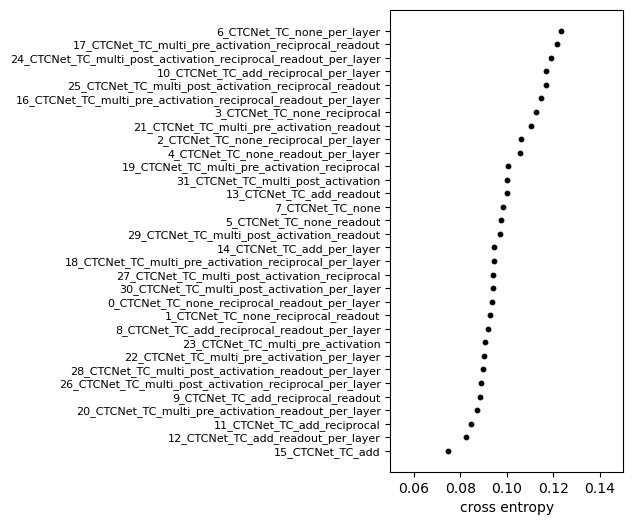

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(3, 6))
ax.scatter(losses_sorted.values(), np.arange(len(losses_sorted.values())), s=10, c="k")
ax.set_xlim(0.05, 0.15)
ax.set_yticks(np.arange(len(losses_sorted.values())))
ax.set_yticklabels(losses_sorted.keys(), size=8)
ax.set_xlabel("cross entropy")